In [16]:
# import required libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import bokeh as bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from prophet import Prophet
from datetime import datetime, timedelta

In [17]:
# pull in full data set for all store sales
all_final_path = Path('data/allStores_2007toPresent_final.xls')
all_final_data = pd.read_excel(all_final_path)
# view top rows in dataframe
all_final_data.head()

,Year,Month,Monthn,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,November,11.0,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2007,November,11.0,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,2007,December,12.0,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,2007,December,12.0,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133


In [37]:
# view last rows in dataframe
all_final_data.tail()

,Year,Month,Monthn,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
989,2024,May,5.0,19.0,30261.43,857,9547.49,160,26200.68,492,3018.85,49,11716.28,277,80744.73,1835
990,2024,May,5.0,20.0,24508.95,755,9729.7,197,24729.34,473,2719.86,49,8478.54,177,70166.39,1651
991,2024,May,5.0,21.0,23260.02,653,7470.76,153,27596.85,571,2497.37,40,6763.67,119,67588.67,1536
992,2024,May,5.0,22.0,12931.37,377,2241.7,50,18877.38,281,2653.46,64,3555.26,70,40259.17,843
993,Grand Total,NaN,NaN,NaN,6050435.64,205587,2753066.75,86811,7794913.54,206641,517653.17,10331,4198729.48,105683,21314798.58,615054


In [38]:
# Process of extracting individual store data contained here: 
# slice out the individual store 1 data columns
temp_store1_data = all_final_data[['Year', 'Week', 'Monthn', 'store 001', 'store 001.1']]
# drop first and last row of data
temp_store1_data = temp_store1_data.drop(index=0)
temp_store1_data = temp_store1_data.drop(index=993)
# rename 
renamed_store1_data = temp_store1_data.rename(columns={'store 001': 'Sales', 'store 001.1': 'Gallons'})
# renamed_store1_data.head()

# slice out the individual store 2 data columns
temp_store2_data = all_final_data[['Year', 'Week', 'Monthn', 'store 002', 'store 002.1']]
# drop first and last row of data
temp_store2_data = temp_store2_data.drop(index=0)
temp_store2_data = temp_store2_data.drop(index=993)
# rename 
renamed_store2_data = temp_store2_data.rename(columns={'store 002': 'Sales', 'store 002.1': 'Gallons'})
# renamed_store2_data.head()

# slice out the individual store 3 data columns
temp_store3_data = all_final_data[['Year', 'Week', 'Monthn', 'store 003', 'store 003.1']]
# drop first and last row of data
temp_store3_data = temp_store3_data.drop(index=0)
temp_store3_data = temp_store3_data.drop(index=993)
# final_store3_data.head()
# rename 
renamed_store3_data = temp_store3_data.rename(columns={'store 003': 'Sales', 'store 003.1': 'Gallons'})
# renamed_store3_data.head()

# slice out the individual store 4 data columns
temp_store4_data = all_final_data[['Year', 'Week', 'Monthn', 'store 004', 'store 004.1']]
# drop first and last row of data
temp_store4_data = temp_store4_data.drop(index=0)
temp_store4_data = temp_store4_data.drop(index=993)
# final_store3_data.head()
# rename 
renamed_store4_data = temp_store4_data.rename(columns={'store 004': 'Sales', 'store 004.1': 'Gallons'})
# renamed_store4_data.head()

# slice out the individual store 5 data columns
temp_store5_data = all_final_data[['Year', 'Week', 'Monthn', 'store 005', 'store 005.1']]
# drop first and last row of data
temp_store5_data = temp_store5_data.drop(index=0)
temp_store5_data = temp_store5_data.drop(index=993)
# final_store3_data.head()
# rename 
renamed_store5_data = temp_store5_data.rename(columns={'store 005': 'Sales', 'store 005.1': 'Gallons'})
# renamed_store5_data.head()

# slice out the individual store 5 data columns
temp_total_data = all_final_data[['Year', 'Week', 'Monthn', 'Total Sales', 'Total gallons']]
# drop first and last row of data
temp_total_data = temp_total_data.drop(index=0)
temp_total_data = temp_total_data.drop(index=993)
# final_store3_data.head()
# rename 
renamed_total_data = temp_total_data.rename(columns={'Total Sales': 'Total_Sales', 'Total gallons': 'Total_Gallons'})
# renamed_total_data.head()

In [34]:
# # slice out the individual store 1 data columns
# temp_store1_data = all_final_data[['Year', 'Week', 'Monthn', 'store 001', 'store 001.1']]
# # drop first and last row of data
# temp_store1_data = temp_store1_data.drop(index=0)
# temp_store1_data = temp_store1_data.drop(index=993)
# # rename 
# renamed_store1_data = temp_store1_data.rename(columns={'store 001': 'Sales', 'store 001.1': 'Gallons'})
# renamed_store1_data.head()

In [10]:
# update dtype for selected columns for date conversion to occur
# renamed_store3_data['Monthn'] = renamed_store3_data['Monthn'].astype(int)

In [39]:
# update dtype for selected columns for date conversion to occur
renamed_store1_data[['Week', 'Monthn']] = renamed_store1_data[['Week', 'Monthn']].astype(int)
renamed_store2_data[['Week', 'Monthn']] = renamed_store2_data[['Week', 'Monthn']].astype(int)
renamed_store3_data[['Week', 'Monthn']] = renamed_store3_data[['Week', 'Monthn']].astype(int)
renamed_store4_data[['Week', 'Monthn']] = renamed_store4_data[['Week', 'Monthn']].astype(int)
renamed_store5_data[['Week', 'Monthn']] = renamed_store5_data[['Week', 'Monthn']].astype(int)
renamed_total_data[['Week', 'Monthn']] = renamed_total_data[['Week', 'Monthn']].astype(int)

In [40]:
# confirm dtype conversion for selection columns
display(renamed_store1_data.info())
display(renamed_store2_data.info())
display(renamed_store3_data.info())
display(renamed_store4_data.info())
display(renamed_store5_data.info())
display(renamed_total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 1 to 992
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     992 non-null    object
 1   Week     992 non-null    int32 
 2   Monthn   992 non-null    int32 
 3   Sales    177 non-null    object
 4   Gallons  176 non-null    object
dtypes: int32(2), object(3)
memory usage: 31.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 1 to 992
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     992 non-null    object
 1   Week     992 non-null    int32 
 2   Monthn   992 non-null    int32 
 3   Sales    417 non-null    object
 4   Gallons  415 non-null    object
dtypes: int32(2), object(3)
memory usage: 31.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 1 to 992
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     992 non-null    object
 1   Week     992 non-null    int32 
 2   Monthn   992 non-null    int32 
 3   Sales    990 non-null    object
 4   Gallons  989 non-null    object
dtypes: int32(2), object(3)
memory usage: 31.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 1 to 992
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     992 non-null    object
 1   Week     992 non-null    int32 
 2   Monthn   992 non-null    int32 
 3   Sales    145 non-null    object
 4   Gallons  144 non-null    object
dtypes: int32(2), object(3)
memory usage: 31.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 1 to 992
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     992 non-null    object
 1   Week     992 non-null    int32 
 2   Monthn   992 non-null    int32 
 3   Sales    608 non-null    object
 4   Gallons  606 non-null    object
dtypes: int32(2), object(3)
memory usage: 31.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 1 to 992
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           992 non-null    object
 1   Week           992 non-null    int32 
 2   Monthn         992 non-null    int32 
 3   Total_Sales    992 non-null    object
 4   Total_Gallons  990 non-null    object
dtypes: int32(2), object(3)
memory usage: 31.1+ KB


None

In [28]:
# Function to calculate date
def get_date(year, month, week):
    first_day_of_month = datetime(year, month, 1)
    # First Monday 
    if first_day_of_month.weekday() <= 3:
        first_monday = first_day_of_month - timedelta(days= first_day_of_month.weekday())
    else:
        first_monday = first_day_of_month + timedelta(days=(7 - first_day_of_month.weekday()))
    # Week Calculation
    first_monday_week = first_monday.isocalendar()
    # Number of weeks to add
    week_diff = int(week) - first_monday_week
    # Date target
    date = first_monday + timedelta(weeks = week_diff)
    return date

In [41]:
# Apply function to DataFrame
renamed_store1_data['date'] = renamed_store1_data.apply(lambda row: get_date(row['Year'], row['Monthn'], row['Week']), axis=1)
renamed_store2_data['date'] = renamed_store2_data.apply(lambda row: get_date(row['Year'], row['Monthn'], row['Week']), axis=1)
renamed_store3_data['date'] = renamed_store3_data.apply(lambda row: get_date(row['Year'], row['Monthn'], row['Week']), axis=1)
renamed_store4_data['date'] = renamed_store4_data.apply(lambda row: get_date(row['Year'], row['Monthn'], row['Week']), axis=1)
renamed_store5_data['date'] = renamed_store5_data.apply(lambda row: get_date(row['Year'], row['Monthn'], row['Week']), axis=1)
renamed_total_data['date'] = renamed_total_data.apply(lambda row: get_date(row['Year'], row['Monthn'], row['Week']), axis=1)

In [43]:
#  print out revised data frame: 
display(renamed_store1_data.head())
display(renamed_store2_data.head())
display(renamed_store3_data.head())
display(renamed_store4_data.head())
display(renamed_store5_data.head())
display(renamed_total_data.head())


,Year,Week,Monthn,Sales,Gallons,date
1,2007,47,11,NaN,NaN,2007-11-19
2,2007,48,11,NaN,NaN,2007-11-26
3,2007,49,12,NaN,NaN,2007-12-03
4,2007,50,12,NaN,NaN,2007-12-10
5,2007,51,12,NaN,NaN,2007-12-17


,Year,Week,Monthn,Sales,Gallons,date
1,2007,47,11,NaN,NaN,2007-11-19
2,2007,48,11,NaN,NaN,2007-11-26
3,2007,49,12,NaN,NaN,2007-12-03
4,2007,50,12,NaN,NaN,2007-12-10
5,2007,51,12,NaN,NaN,2007-12-17


,Year,Week,Monthn,Sales,Gallons,date
1,2007,47,11,0,NaN,2007-11-19
2,2007,48,11,4697.64,148,2007-11-26
3,2007,49,12,3233.57,88,2007-12-03
4,2007,50,12,4526.86,133,2007-12-10
5,2007,51,12,7291.96,250,2007-12-17


,Year,Week,Monthn,Sales,Gallons,date
1,2007,47,11,NaN,NaN,2007-11-19
2,2007,48,11,NaN,NaN,2007-11-26
3,2007,49,12,NaN,NaN,2007-12-03
4,2007,50,12,NaN,NaN,2007-12-10
5,2007,51,12,NaN,NaN,2007-12-17


,Year,Week,Monthn,Sales,Gallons,date
1,2007,47,11,NaN,NaN,2007-11-19
2,2007,48,11,NaN,NaN,2007-11-26
3,2007,49,12,NaN,NaN,2007-12-03
4,2007,50,12,NaN,NaN,2007-12-10
5,2007,51,12,NaN,NaN,2007-12-17


,Year,Week,Monthn,Total_Sales,Total_Gallons,date
1,2007,47,11,0,NaN,2007-11-19
2,2007,48,11,4697.64,148,2007-11-26
3,2007,49,12,3233.57,88,2007-12-03
4,2007,50,12,4526.86,133,2007-12-10
5,2007,51,12,7291.96,250,2007-12-17


In [45]:
# slice out last required fields for data processing and predicting in final format:
final_store1_data = renamed_store1_data[['date', 'Sales', 'Gallons']]
final_store2_data = renamed_store2_data[['date', 'Sales', 'Gallons']]
final_store3_data = renamed_store3_data[['date', 'Sales', 'Gallons']]
final_store4_data = renamed_store4_data[['date', 'Sales', 'Gallons']]
final_store5_data = renamed_store5_data[['date', 'Sales', 'Gallons']]
final_total_data = renamed_total_data[['date', 'Total_Sales', 'Total_Gallons']]


In [46]:
# display final dataframe for validation: 
# final_store1_data.head()
# final_store2_data.head()
# final_store3_data.head()
# final_store4_data.head()
# final_store5_data.head()
final_total_data.head()

,date,Total_Sales,Total_Gallons
1,2007-11-19,0,NaN
2,2007-11-26,4697.64,148
3,2007-12-03,3233.57,88
4,2007-12-10,4526.86,133
5,2007-12-17,7291.96,250


In [47]:
# output dataframes to csv file for others to use: 
final_store1_data.to_csv('data/store1_data.csv', index= False)
final_store2_data.to_csv('data/store2_data.csv', index= False)
final_store3_data.to_csv('data/store3_data.csv', index= False)
final_store4_data.to_csv('data/store4_data.csv', index= False)
final_store5_data.to_csv('data/store5_data.csv', index= False)
final_total_data.to_csv('data/total_data.csv', index= False)

In [50]:
final_total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 1 to 992
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           992 non-null    datetime64[ns]
 1   Total_Sales    992 non-null    object        
 2   Total_Gallons  990 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 23.4+ KB


<Axes: xlabel='date'>

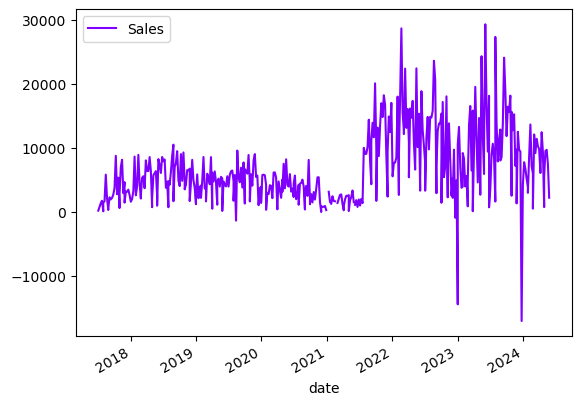

In [49]:
final_store2_data.plot.line(
    x= 'date',
    y= 'Sales',
    colormap = 'rainbow'
)